In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [32]:
df.shape

(4269, 13)

In [33]:
df.describe(include="all")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [34]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [35]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [36]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [37]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column, ":",df[column].value_counts().keys())

 education : Index([' Graduate', ' Not Graduate'], dtype='object', name=' education')
 self_employed : Index([' Yes', ' No'], dtype='object', name=' self_employed')
 loan_status : Index([' Approved', ' Rejected'], dtype='object', name=' loan_status')


In [38]:
try:
    df["loan_status"].values
except:
    print("The column name is not right due to a space in it")

The column name is not right due to a space in it


In [39]:
df.columns = df.columns.str.strip()

In [40]:
df["loan_status"].values
# spaces are removed

array([' Approved', ' Rejected', ' Rejected', ..., ' Rejected',
       ' Approved', ' Approved'], dtype=object)

In [41]:
df.drop(columns=["loan_id"], inplace=True)

In [42]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [43]:
df["loan_status"].values

# the spaces are removed

array(['Approved', 'Rejected', 'Rejected', ..., 'Rejected', 'Approved',
       'Approved'], dtype=object)

In [44]:
label_cols = ['education', 'self_employed', 'loan_status']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [45]:
x = df.drop(columns=["loan_status"])
y = df["loan_status"]

In [46]:
y.value_counts(normalize=True)

loan_status
0    0.62216
1    0.37784
Name: proportion, dtype: float64

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       531
           1       0.73      0.71      0.72       323

    accuracy                           0.79       854
   macro avg       0.78      0.78      0.78       854
weighted avg       0.79      0.79      0.79       854



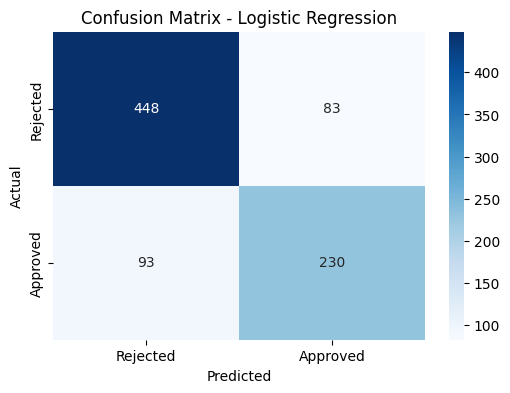

In [48]:
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg.fit(x_train, y_train)

y_pred_log = log_reg.predict(x_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))



cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531
           1       0.97      0.95      0.96       323

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



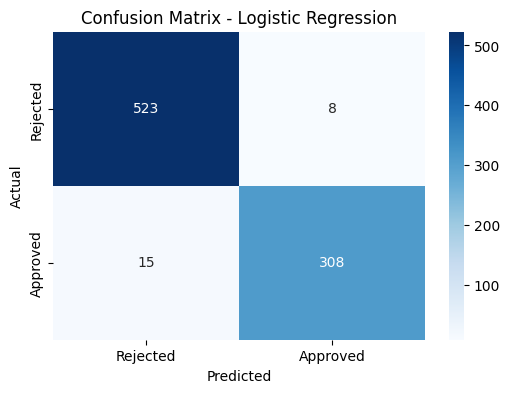

In [ ]:

tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_test)
print("Decision Tree:")
print(classification_report(y_test, y_pred_tree))

cm = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [53]:
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

c:\Users\polam\anaconda3\envs\yolov8\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       531
           1       0.74      0.73      0.74       323

    accuracy                           0.80       854
   macro avg       0.79      0.79      0.79       854
weighted avg       0.80      0.80      0.80       854



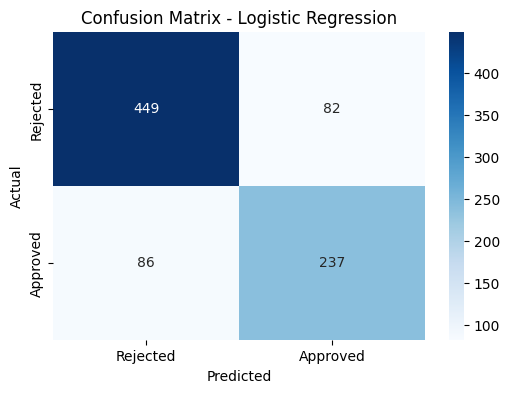

In [57]:
# Train
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_lr = lr_model.predict(x_test)

# Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.97      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



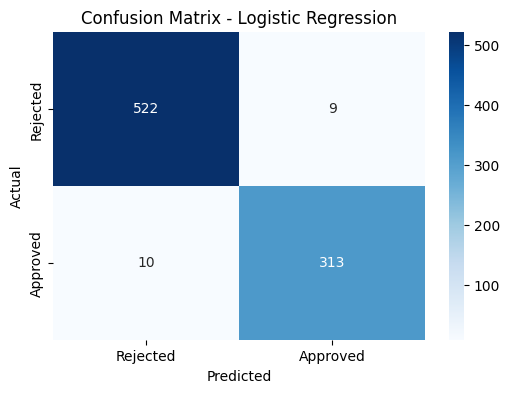

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

# Predict
y_pred_dt = dt_model.predict(x_test)

# Evaluation
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
